In [3]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils
from fastf1.plotting import TEAM_COLORS

/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/__init__.py:82: FutureWarning: TEAM_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "


In [4]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1')


# load a session and its telemetry data
session = fastf1.get_session(2024, 'Brasil Grand Prix', 'Sprint')
session.load()
# In this way i Can exclude the box laps
laps = session.laps.pick_wo_box()

# Pick just the accurate laps
laps = laps[laps['IsAccurate']==True]

circuit_info = session.get_circuit_info()




req         WARNING 	DEFAULT CACHE ENABLED! (1.33 GB) /Users/PietroPaolo/Library/Caches/fastf1
events      WARNING 	Correcting user input 'Brasil Grand Prix' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Sprint [v3.4.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No

In [5]:
display(laps)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 00:46:59.125000,VER,1,0 days 00:01:12.311000,2.0,1.0,NaT,NaT,0 days 00:00:18.902000,0 days 00:00:37.261000,...,False,Red Bull Racing,0 days 00:45:46.814000,2024-11-02 14:04:28.683,1,4.0,False,,False,True
2,0 days 00:48:11.579000,VER,1,0 days 00:01:12.454000,3.0,1.0,NaT,NaT,0 days 00:00:18.813000,0 days 00:00:37.327000,...,False,Red Bull Racing,0 days 00:46:59.125000,2024-11-02 14:05:40.994,1,4.0,False,,False,True
3,0 days 00:49:24.140000,VER,1,0 days 00:01:12.561000,4.0,1.0,NaT,NaT,0 days 00:00:18.555000,0 days 00:00:37.462000,...,False,Red Bull Racing,0 days 00:48:11.579000,2024-11-02 14:06:53.448,1,4.0,False,,False,True
4,0 days 00:50:36.444000,VER,1,0 days 00:01:12.304000,5.0,1.0,NaT,NaT,0 days 00:00:18.726000,0 days 00:00:37.101000,...,False,Red Bull Racing,0 days 00:49:24.140000,2024-11-02 14:08:06.009,1,4.0,False,,False,True
5,0 days 00:51:48.350000,VER,1,0 days 00:01:11.906000,6.0,1.0,NaT,NaT,0 days 00:00:18.579000,0 days 00:00:36.969000,...,False,Red Bull Racing,0 days 00:50:36.444000,2024-11-02 14:09:18.313,1,4.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,0 days 01:05:00.840000,PIA,81,0 days 00:01:11.783000,17.0,1.0,NaT,NaT,0 days 00:00:18.744000,0 days 00:00:36.648000,...,False,McLaren,0 days 01:03:49.057000,2024-11-02 14:22:30.926,1,1.0,False,,False,True
469,0 days 01:06:13.481000,PIA,81,0 days 00:01:12.641000,18.0,1.0,NaT,NaT,0 days 00:00:19.124000,0 days 00:00:37.001000,...,False,McLaren,0 days 01:05:00.840000,2024-11-02 14:23:42.709,1,1.0,False,,False,True
470,0 days 01:07:25.635000,PIA,81,0 days 00:01:12.154000,19.0,1.0,NaT,NaT,0 days 00:00:18.886000,0 days 00:00:36.792000,...,False,McLaren,0 days 01:06:13.481000,2024-11-02 14:24:55.350,1,1.0,False,,False,True
471,0 days 01:08:37.942000,PIA,81,0 days 00:01:12.307000,20.0,1.0,NaT,NaT,0 days 00:00:18.955000,0 days 00:00:36.930000,...,False,McLaren,0 days 01:07:25.635000,2024-11-02 14:26:07.504,1,1.0,False,,False,True


In [6]:
drivers =laps['Driver'].unique()
compounds = laps['Compound'].unique()


In [7]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.

    Parameters:
    - td: pd.Timedelta

    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [8]:
# Transform the laps in total seconds
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    # Clean up team names by stripping extra spaces
    team = team.strip()

    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            # Use the internal TEAM_COLORS dictionary for the team color
            return TEAM_COLORS[team.lower()]  # Ensure team name matches the expected format
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

# Create the palette, ensuring teams are processed correctly
team_palette = {team: get_team_color(team) for team in team_order}

In [9]:
colors = {
    "SAI": "red", "LEC": "red", "NOR": "orange", "PIA": "orange", "PER": "blue",
    "ALO": "green", "RUS": "grey", "STR": "green", "TSU": "#9932CC", "BOT": "lime",
    "OCO": "pink", "HUL": "olive", "MAG": "olive", "RIC": "#9932CC", "ALB": "navy",
    "ZHO": "lime", "GAS": "pink", "HAM": "grey", "VER": "blue", 'SAR':"navy", 'DEV': "#9932CC",
    'BEA': "olive", 'LAW':  "#9932CC", 'MSC': "olive", 'LAT': "navy", 'VET' : "green", 'COL':"navy"
}

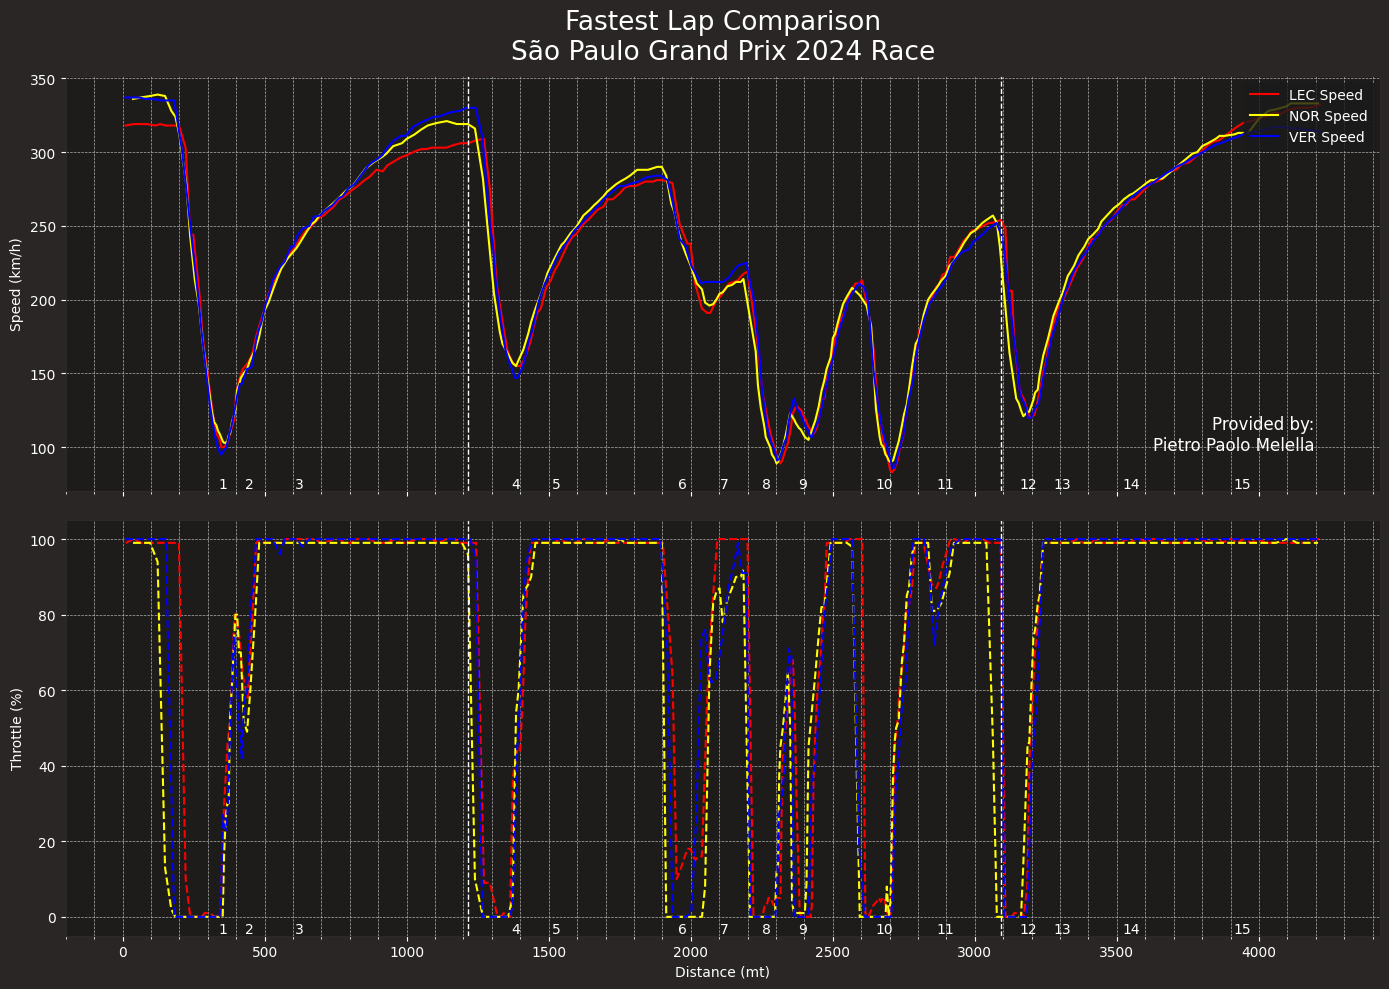

In [10]:
# Extract fastest laps for LEC and SAI
LEC_FASTEST_LAP = transformed_laps.pick_drivers('LEC').pick_fastest()
SAI_FASTEST_LAP = transformed_laps.pick_drivers('SAI').pick_fastest()
NOR_FASTEST_LAP = transformed_laps.pick_drivers('NOR').pick_fastest()
VER_FASTEST_LAP = transformed_laps.pick_drivers('VER').pick_fastest()

# Get telemetry data and add distance
LEC_tel = LEC_FASTEST_LAP.get_car_data().add_distance()
SAI_tel = SAI_FASTEST_LAP.get_car_data().add_distance()
NOR_tel = NOR_FASTEST_LAP.get_car_data().add_distance()
VER_tel = VER_FASTEST_LAP.get_car_data().add_distance()


# Length of the track
length_circuit = LEC_tel['Distance'].max()

# Get sector times for the fastest lap
LEC_sector_times = [
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector1Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector2Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector3Time'])
]

# Calculate total lap time
total_lap_time = sum(LEC_sector_times)

# Calculate sector end distances
sector1_end_distance = LEC_tel[LEC_tel['Time'] <= LEC_FASTEST_LAP['Sector1Time']]['Distance'].max()
sector2_end_distance = LEC_tel[LEC_tel['Time'] <= (LEC_FASTEST_LAP['Sector1Time'] + LEC_FASTEST_LAP['Sector2Time'])]['Distance'].max()

# Extract the 'Distance' column from the corners DataFrame
corner_distances = circuit_info.corners['Distance']
# Generate corner numbers based on the number of corners
corner_numbers = range(1, len(corner_distances) + 1)  # Generates sequential numbers from 1 to the number of corners


# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Apply a dark background
plt.style.use('dark_background')

# Plot Speed on the first subplot
ax1.plot(LEC_tel['Distance'], LEC_tel['Speed'], color='red', label='LEC Speed')
ax1.plot(NOR_tel['Distance'], NOR_tel['Speed'], color='yellow', label='NOR Speed')
ax1.plot(VER_tel['Distance'], VER_tel['Speed'], color='blue', label='VER Speed')
ax1.set_ylabel('Speed (km/h)', color='white')
ax1.tick_params(axis='y', colors='white')
ax1.tick_params(axis='x', colors='white')
ax1.grid(which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='upper right')
ax1.set_title(f"Fastest Lap Comparison\n{session.event['EventName']} {session.event.year} Race", color='white')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(100))

ax1.text(
    0.95, 1.16, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)
# Annotate with corner numbers on ax1
for corner, number in zip(corner_distances, corner_numbers):
    ax1.text(corner, ax1.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')

# Plot Throttle on the second subplot
ax2.plot(LEC_tel['Distance'], LEC_tel['Throttle'], color='red', linestyle='--', label='LEC Throttle')
ax2.plot(NOR_tel['Distance'], NOR_tel['Throttle'], color='yellow', linestyle='--', label='NOR Throttle')
ax2.plot(VER_tel['Distance'], VER_tel['Throttle'], color='blue', linestyle='--', label='VER Throttle')
ax2.set_xlabel('Distance (mt)', color='white')
ax2.set_ylabel('Throttle (%)', color='white')
ax2.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')
ax2.grid(which='both', linestyle='--', linewidth=0.5)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax2
for corner, number in zip(corner_distances, corner_numbers):
    ax2.text(corner, ax2.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')


# Add custom vertical dashed lines for sectors to both subplots
for ax in [ax1, ax2]:
    ax.axvline(x=sector1_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 1')
    ax.axvline(x=sector2_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 2')

# Adjust layout
plt.tight_layout()
plt.show()


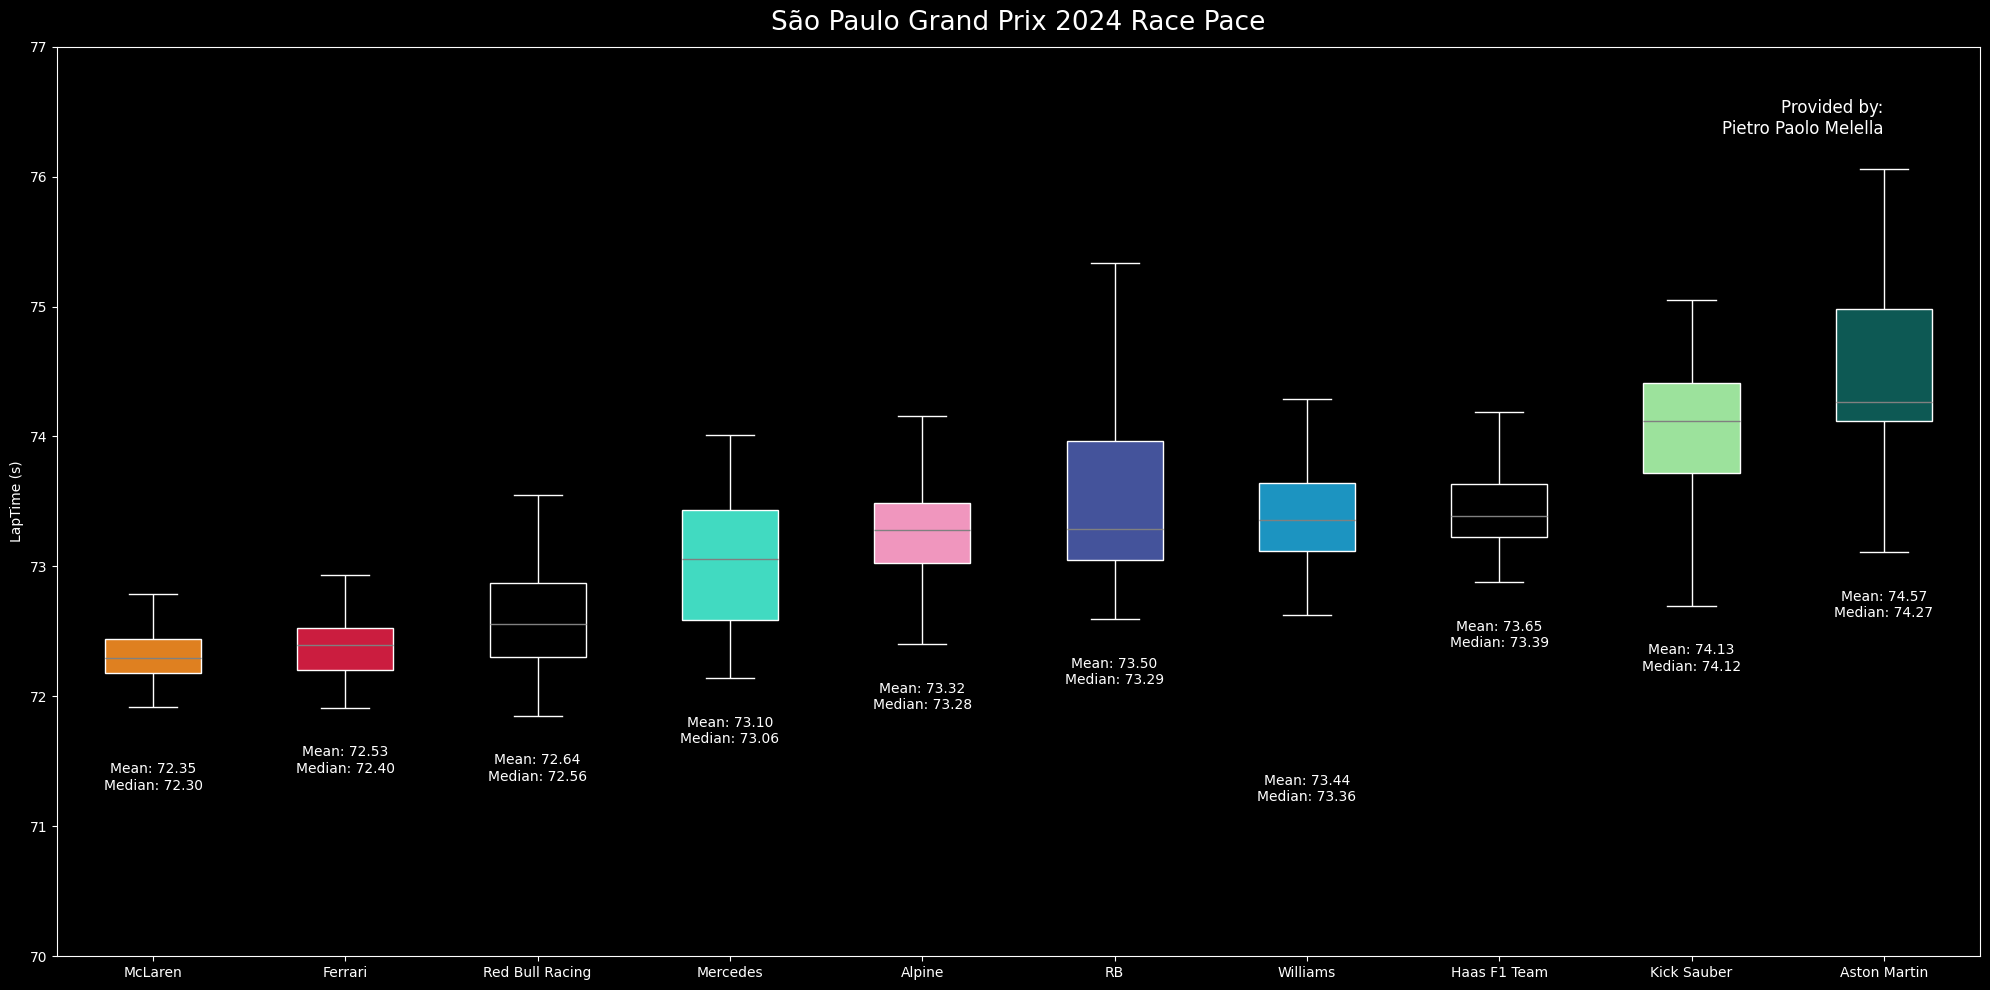

In [23]:
# First, calculate the mean and median times for each team
transformed_laps.reset_index(drop=True, inplace=True)

team_stats = transformed_laps.groupby('Team')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

fig, ax = plt.subplots(figsize=(20, 10))  # Increased figure size to accommodate wider boxes
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False  # Ensure that boxes are centered under each team name
)

# Set y-axis limit (based on data range, adjust accordingly)
ax.set_ylim(70, 77)  # Example range, adjust based on your data

# Loop through the teams and add mean and median text under each whisker
for i, team in enumerate(team_order):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = team_stats.loc[team, 'min']  # Adjust to 'max' if you want the label under the upper whisker

    mean_time = team_stats.loc[team, 'mean']
    median_time = team_stats.loc[team, 'median']

    # Place the text slightly below the whisker (min value in this case), adjust y-position
    ax.text(
        i, whisker_position - 0.5,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}',
        horizontalalignment='center', color='white', fontsize=10
    )

# Update plot title and remove grid
plt.title(f"{session.event['EventName']} {session.event.year} Race Pace")
plt.grid(visible=False)

# Add source text in a more readable position
plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='white', fontsize=12
)

# Remove redundant x-label
ax.set(xlabel=None)

# Tight layout and display
plt.tight_layout()
plt.show()

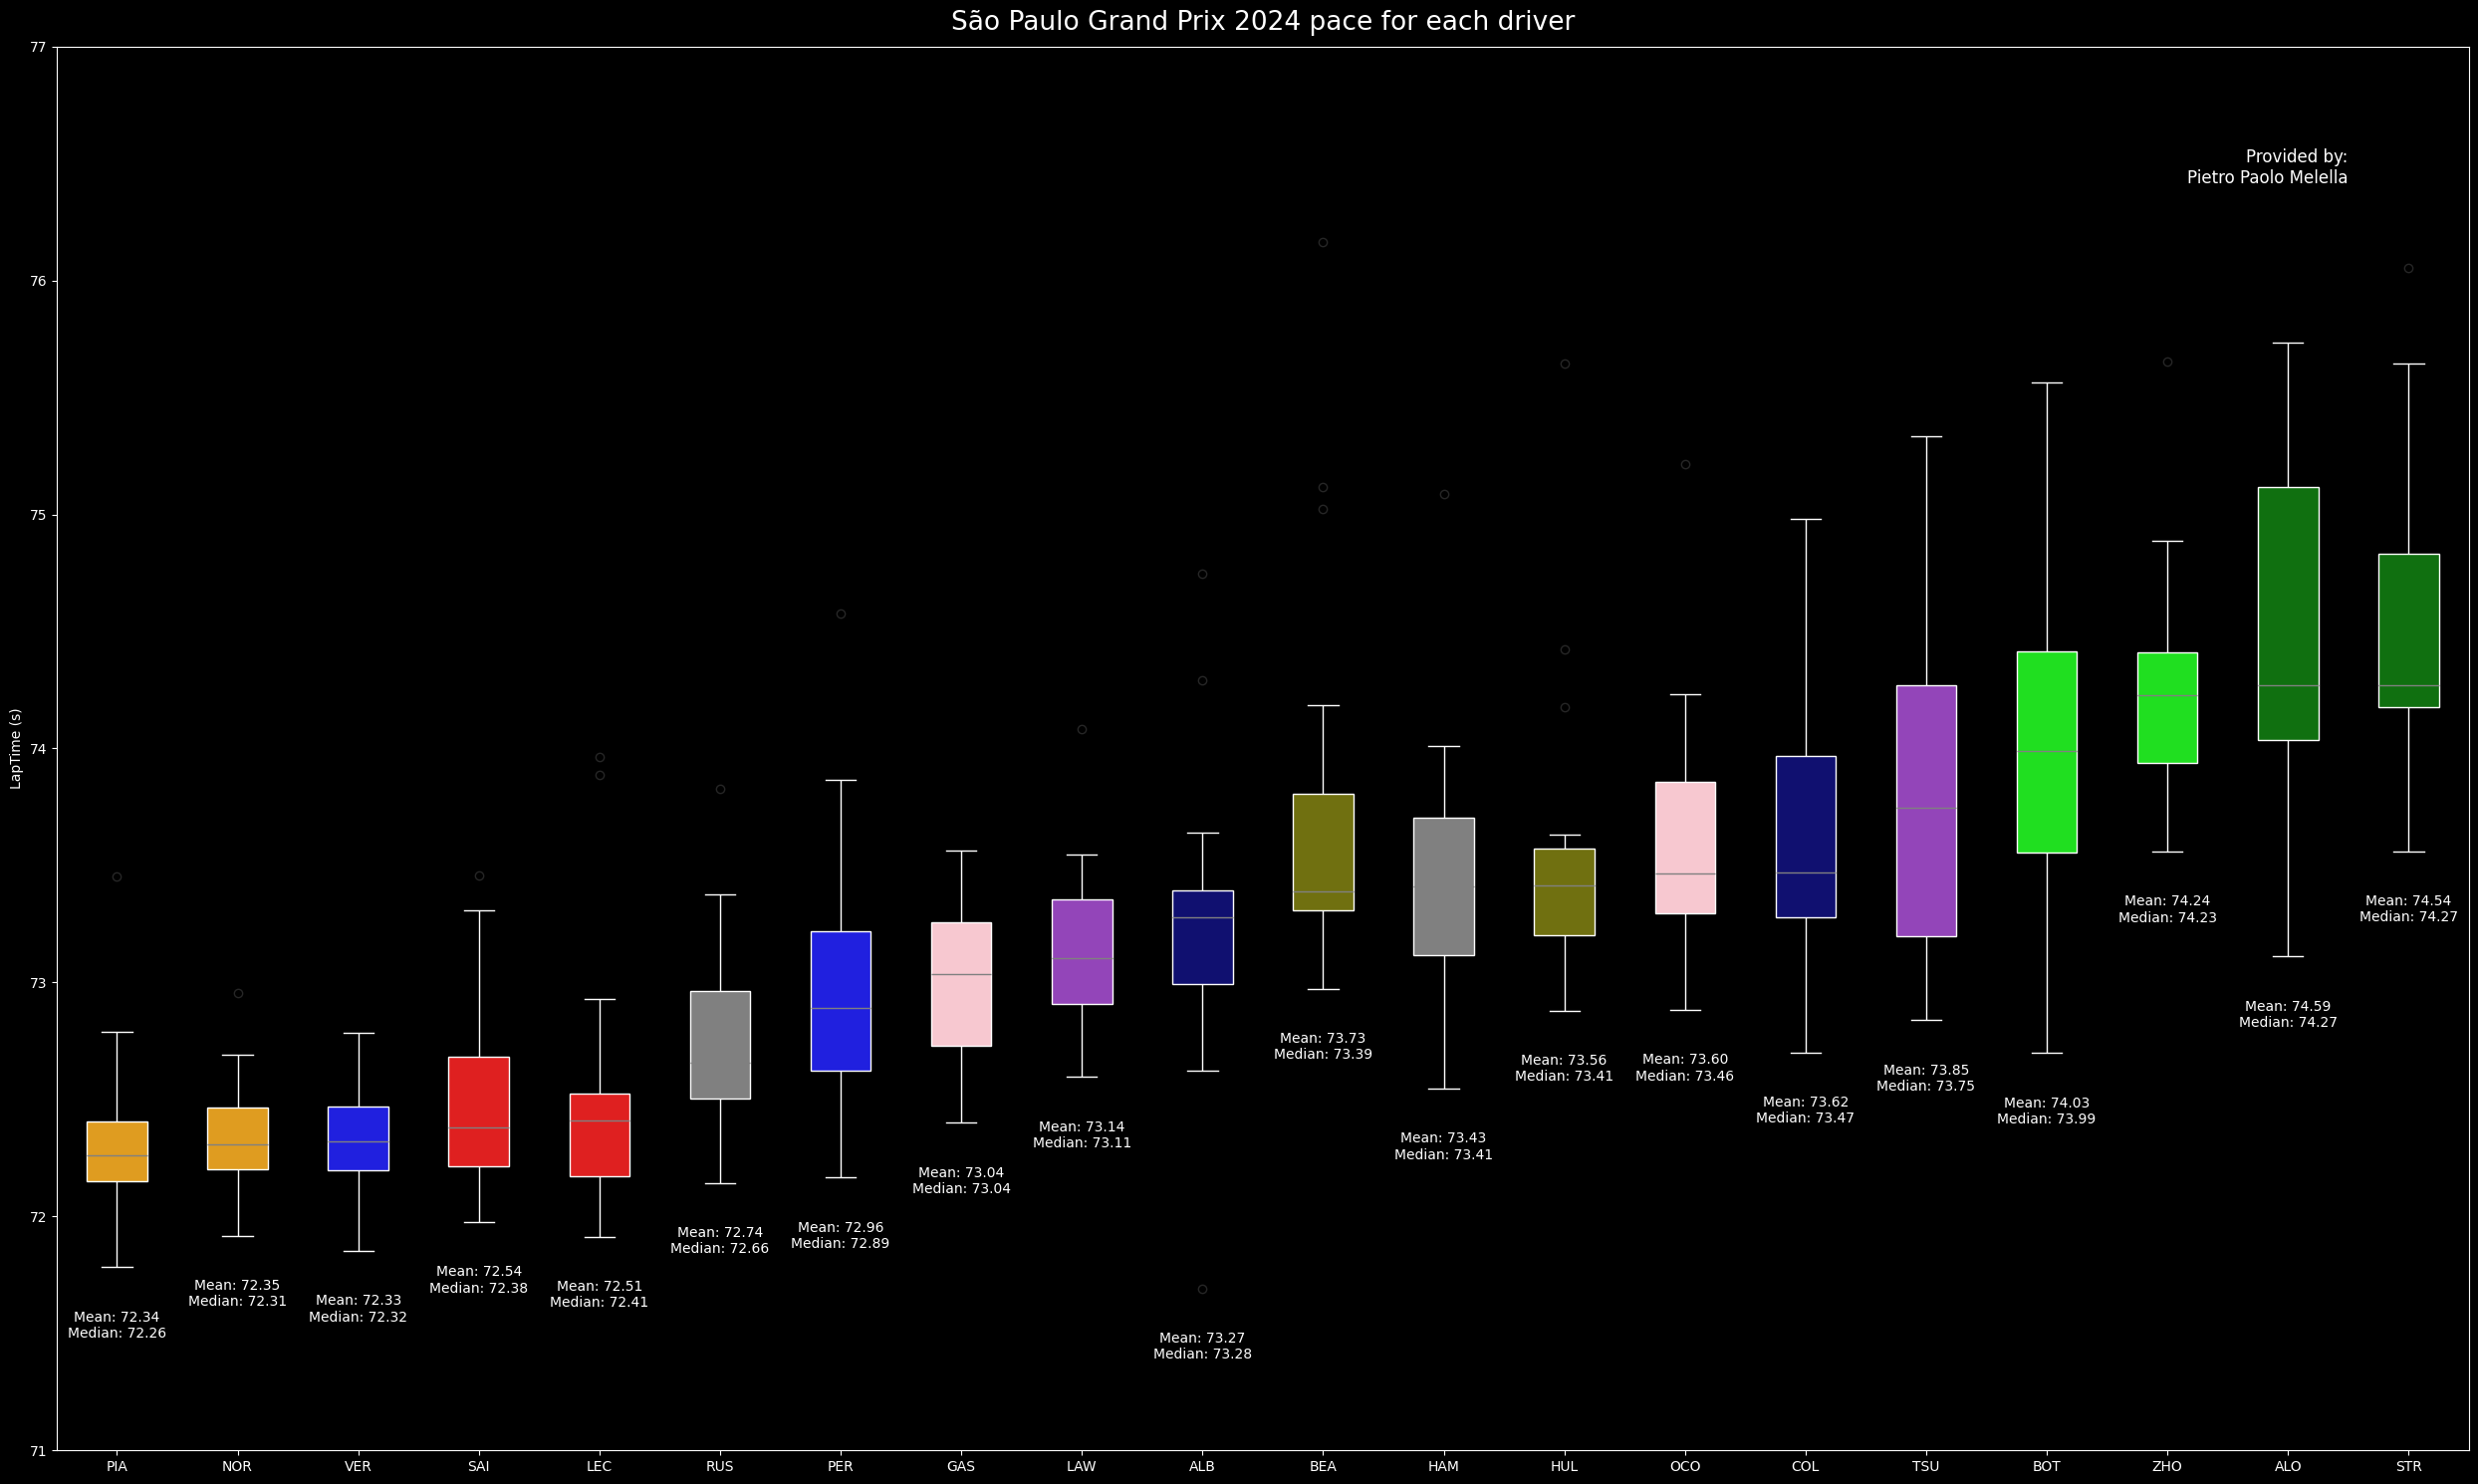

In [20]:
colors = {
    "SAI": "red", "LEC": "red", "NOR": "orange", "PIA": "orange", "PER": "blue",
    "ALO": "green", "RUS": "grey", "STR": "green", "TSU": "#9932CC", "BOT": "lime",
    "OCO": "pink", "HUL": "olive", "MAG": "olive", "RIC": "#9932CC", "ALB": "navy",
    "ZHO": "lime", "GAS": "pink", "HAM": "grey", "VER": "blue", 'SAR':"navy", 'DEV': "#9932CC",
    'BEA': "olive", 'LAW':  "#9932CC", 'MSC': "olive", 'LAT': "navy", 'VET' : "green", 'COL':"navy"
}

drivers_stats = transformed_laps.groupby('Driver')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

median_lap_times = drivers_stats['median']

# Sort the drivers based on the median lap times
sorted_drivers = median_lap_times.sort_values().index

fig, ax = plt.subplots(figsize=(25, 15))  # Increased figure size to accommodate wider boxes
sns.boxplot(
    data=transformed_laps,
    x="Driver",
    y="LapTime (s)",
    hue="Driver",  # Assigning the `x` variable to `hue`
    palette=colors,
    order=sorted_drivers,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False,  # Ensure that boxes are centered under each team name
    legend=False  # Disable the legend to avoid redundancy
)


# Loop through the teams and add mean and median text under each whisker
for i, drivers in enumerate(sorted_drivers):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = drivers_stats.loc[drivers, 'min']  # Adjust to 'max' if you want the label under the upper whisker

    mean_time = drivers_stats.loc[drivers, 'mean']
    median_time = drivers_stats.loc[drivers, 'median']

    # Place the text slightly below the whisker (min value in this case), adjust y-position
    ax.text(
        i, whisker_position - 0.3,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}',
        horizontalalignment='center', color='white', fontsize=10
    )


plt.title(f"{session.event['EventName']} {session.event.year} pace for each driver")
plt.grid(visible=False)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

# Set y-axis limit (based on data range, adjust accordingly)
ax.set_ylim(71,77)  # Example range, adjust based on your data
# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

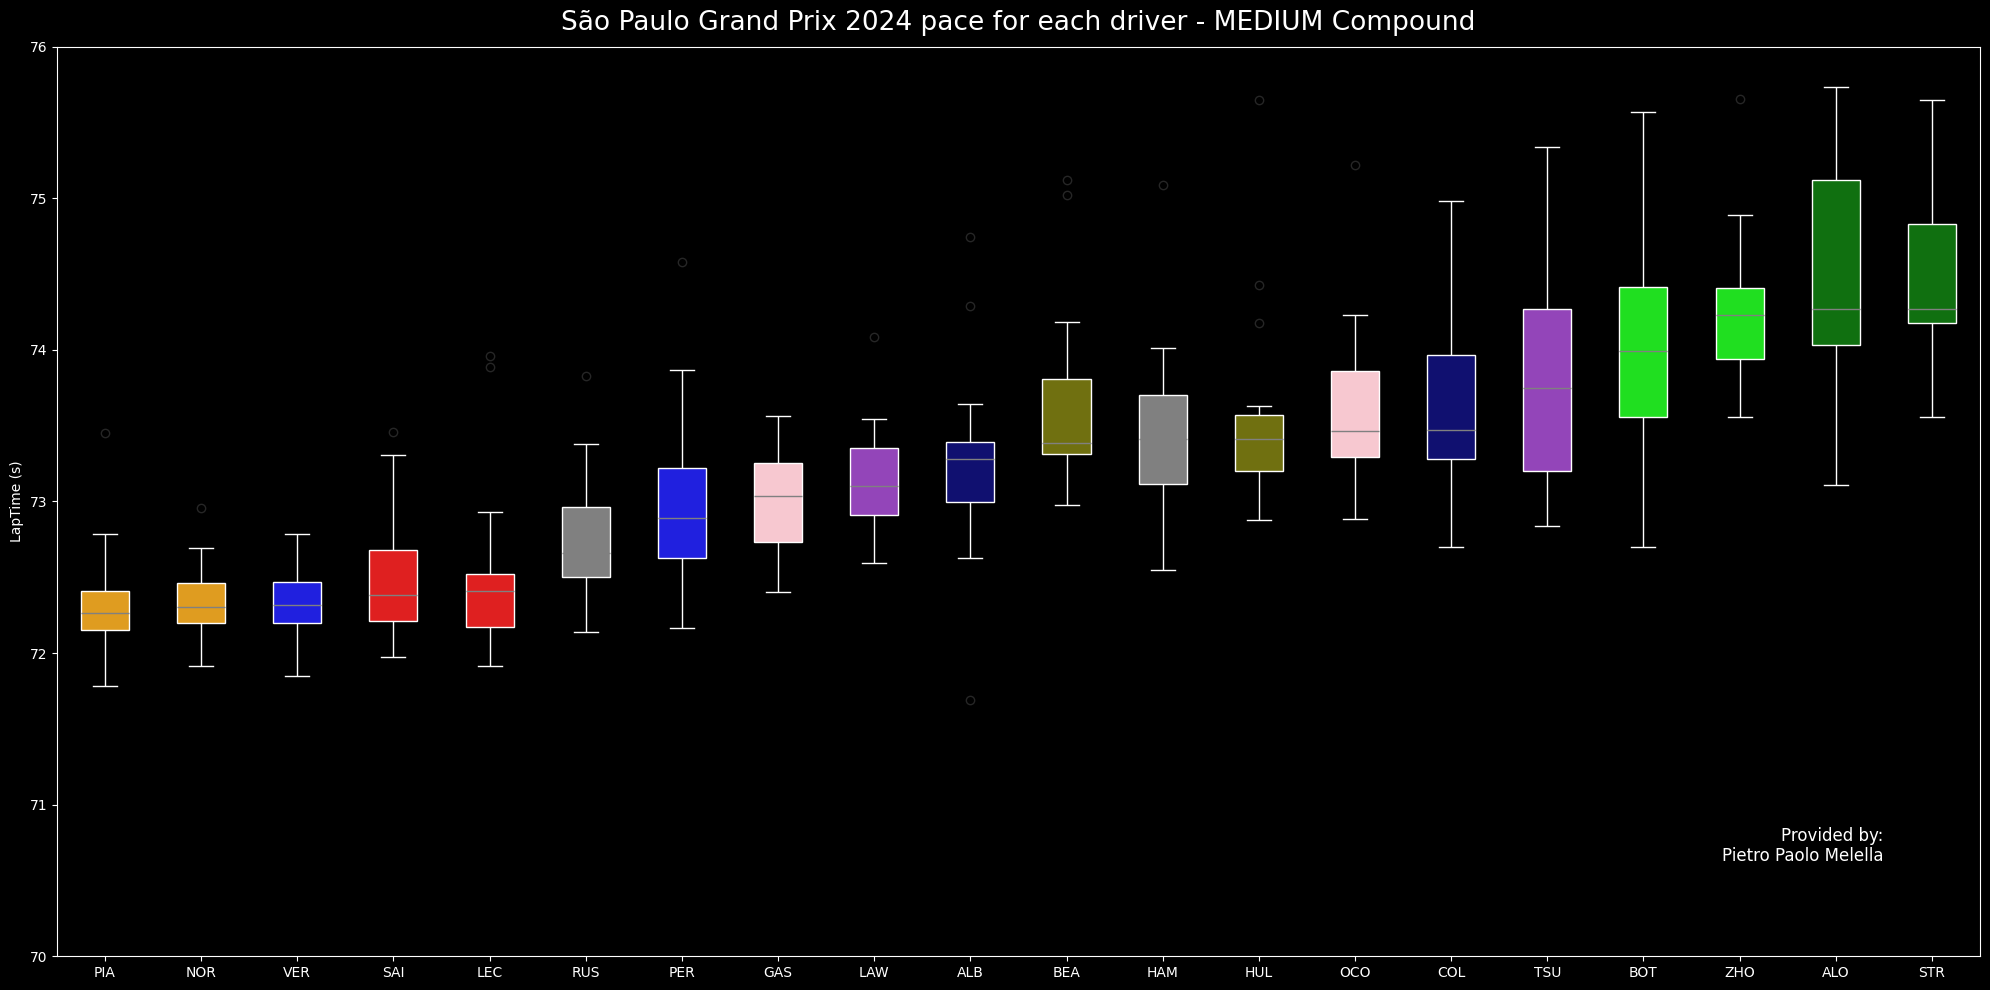

In [21]:
# Define the function to generate the plot for a given compound
def plot_lap_times_for_compound(compound, transformed_laps, colors):
    transformed_laps_with_compound = transformed_laps[transformed_laps['Compound'] == compound]
    transformed_laps_with_compound.reset_index(drop=True, inplace=True)
    median_lap_times_with_compound = transformed_laps_with_compound.groupby('Driver')['LapTime (s)'].median()
    sorted_drivers = median_lap_times_with_compound.sort_values().index

    fig, ax = plt.subplots(figsize=(20, 10))  # Increased figure size to accommodate wider boxes
    sns.boxplot(
    data=transformed_laps_with_compound,
    x="Driver",
    y="LapTime (s)",
    hue="Driver",  # Assigning the `x` variable to `hue`
    palette=colors,
    order=sorted_drivers,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False,  # Ensure that boxes are centered under each team name
    legend=False  # Disable the legend since it would be redundant
)

    plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

    plt.title(f"{session.event['EventName']} {session.event.year} pace for each driver - {compound} Compound")
    plt.grid(visible=False)
    ax.set(xlabel=None)
    # Set y-axis limit (based on data range, adjust accordingly)
    ax.set_ylim(70, 76)  # Example range, adjust based on your data
    plt.tight_layout()
    plt.show()

# Generate plots for each compound
for compound in compounds:
    plot_lap_times_for_compound(compound, transformed_laps, colors)

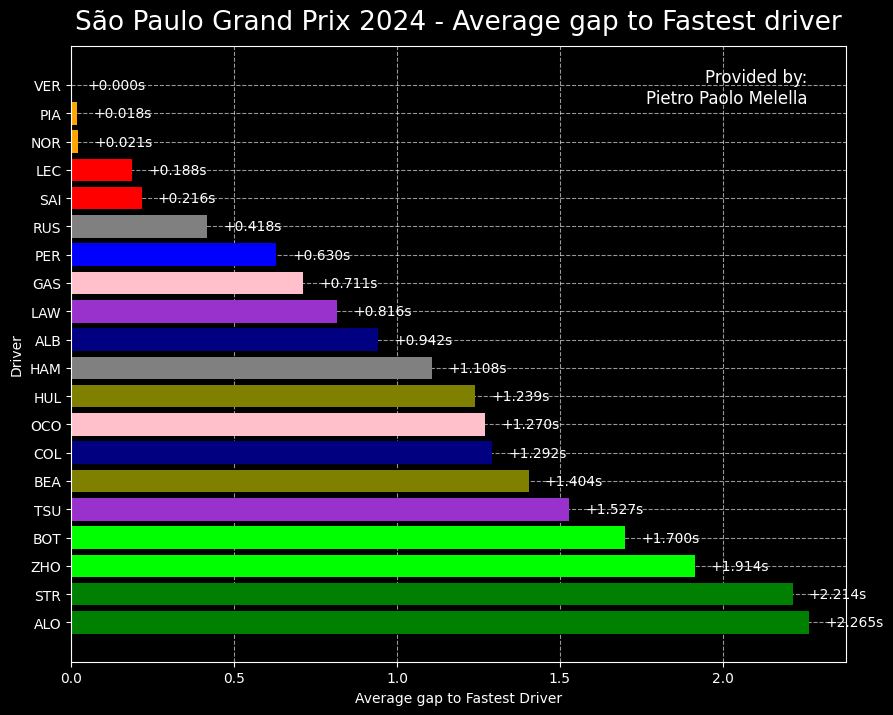

In [14]:
mean_lap_times = transformed_laps.groupby('Driver')['LapTime (s)'].mean()

# Find the fastest lap time
fastest_lap_time = mean_lap_times.min()

# Compute the gap from the fastest lap time for each driver
gap_from_fastest = mean_lap_times - fastest_lap_time

# Sort the gap_from_fastest for better visualization (fastest to slowest)
gap_from_fastest = gap_from_fastest.sort_values(ascending=True)


# Plot the data
plt.figure(figsize=(10, 8))
bars = plt.barh(gap_from_fastest.index, gap_from_fastest.values, color=[colors[driver] for driver in gap_from_fastest.index])
plt.xlabel("Average gap to Fastest Driver")
plt.ylabel("Driver")
plt.title(f"{session.event['EventName']} {session.event.year} - Average gap to Fastest driver")

# Add mean lap times as text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'+{width:.3f}s',
             va='center', ha='left', color='white', fontsize=10)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # To display the fastest on top
plt.show()

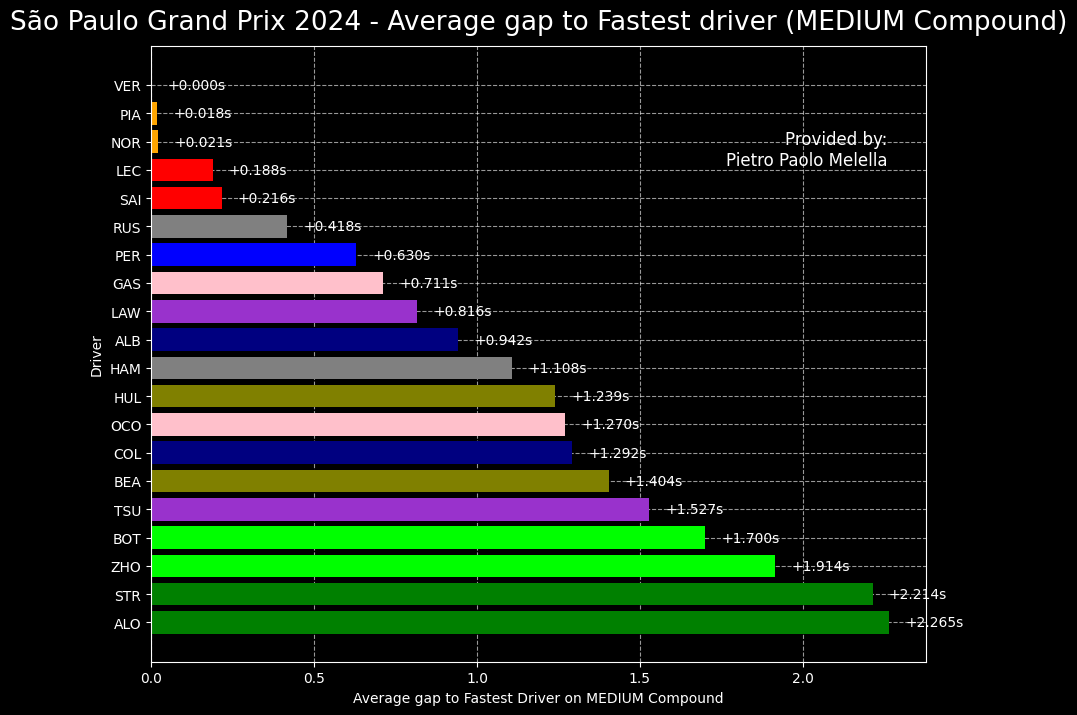

In [15]:
# Calculate mean lap times for each compound
mean_lap_times_per_compound = transformed_laps.groupby(['Driver', 'Compound'])['LapTime (s)'].mean().unstack()

# Iterate over each compound and create a separate plot
for compound in mean_lap_times_per_compound.columns:
    # Replace NaN values with a large number (indicating no lap times for that compound)
    mean_lap_times_per_compound[compound] = mean_lap_times_per_compound[compound].fillna(np.inf)

    # Find the fastest lap time for this compound (ignoring inf values)
    fastest_lap_time_compound = mean_lap_times_per_compound[compound][mean_lap_times_per_compound[compound] != np.inf].min()

    # Compute the gap from the fastest lap time for each driver (for this compound)
    gap_from_fastest_compound = mean_lap_times_per_compound[compound] - fastest_lap_time_compound

    # Sort the gaps for better visualization (fastest to slowest)
    gap_from_fastest_compound = gap_from_fastest_compound.sort_values(ascending=True)

    # Plot the data for this compound
    plt.figure(figsize=(10, 8))
    bars = plt.barh(gap_from_fastest_compound.index, gap_from_fastest_compound.values,
                    color=[colors[driver] for driver in gap_from_fastest_compound.index])
    plt.xlabel(f"Average gap to Fastest Driver on {compound} Compound")
    plt.ylabel("Driver")
    plt.title(f"{session.event['EventName']} {session.event.year} - Average gap to Fastest driver ({compound} Compound)")

    plt.text(
    0.95, 0.8, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

    # Add mean lap times as text labels on the bars
    for bar in bars:
        width = bar.get_width()
        if np.isfinite(width):  # Ensure we only try to plot finite values
            plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'+{width:.3f}s',
                     va='center', ha='left', color='white', fontsize=10)

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.gca().invert_yaxis()  # To display the fastest on top
    plt.show()

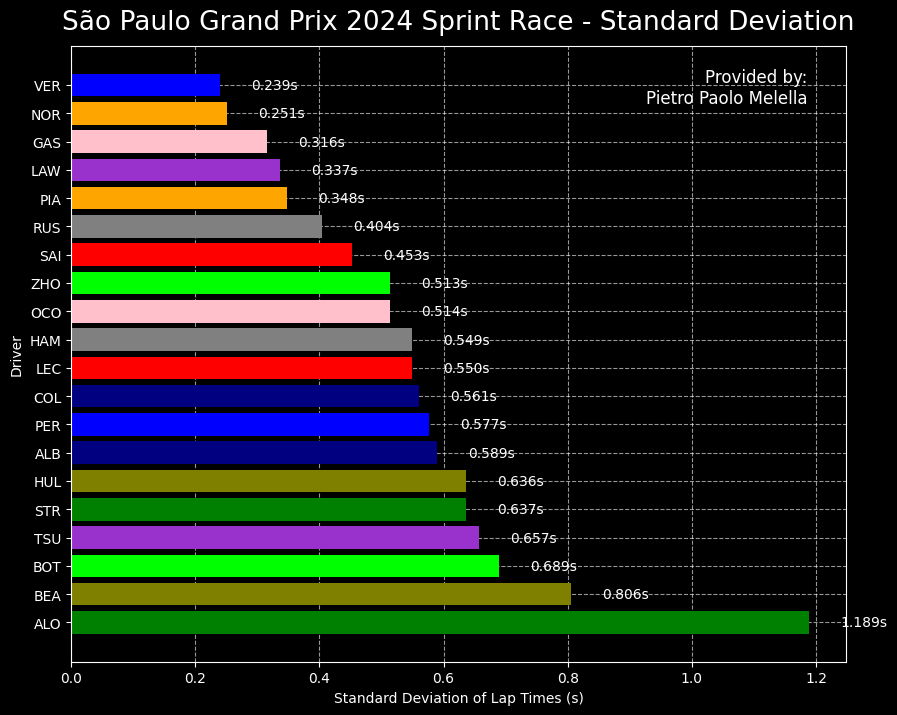

In [ ]:
# Calculate the standard deviation of lap times for each driver
std_lap_times = transformed_laps.groupby('Driver')['LapTime (s)'].std()

# Sort the standard deviation values for better visualization (lowest to highest)
std_lap_times_sorted = std_lap_times.sort_values(ascending=True)

# Plot the data
plt.figure(figsize=(10, 8))
bars = plt.barh(std_lap_times_sorted.index, std_lap_times_sorted.values, 
                color=[colors[driver] for driver in std_lap_times_sorted.index])
plt.xlabel("Standard Deviation of Lap Times (s)")
plt.ylabel("Driver")
plt.title(f"{session.event['EventName']} {session.event.year} Sprint Race - Standard Deviation")

# Add standard deviation values as text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'{width:.3f}s',
             va='center', ha='left', color='white', fontsize=10)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # To display the most consistent drivers on top
plt.show()